     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  
Class
1    250
0    150
Name: count, dtype: int64
Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


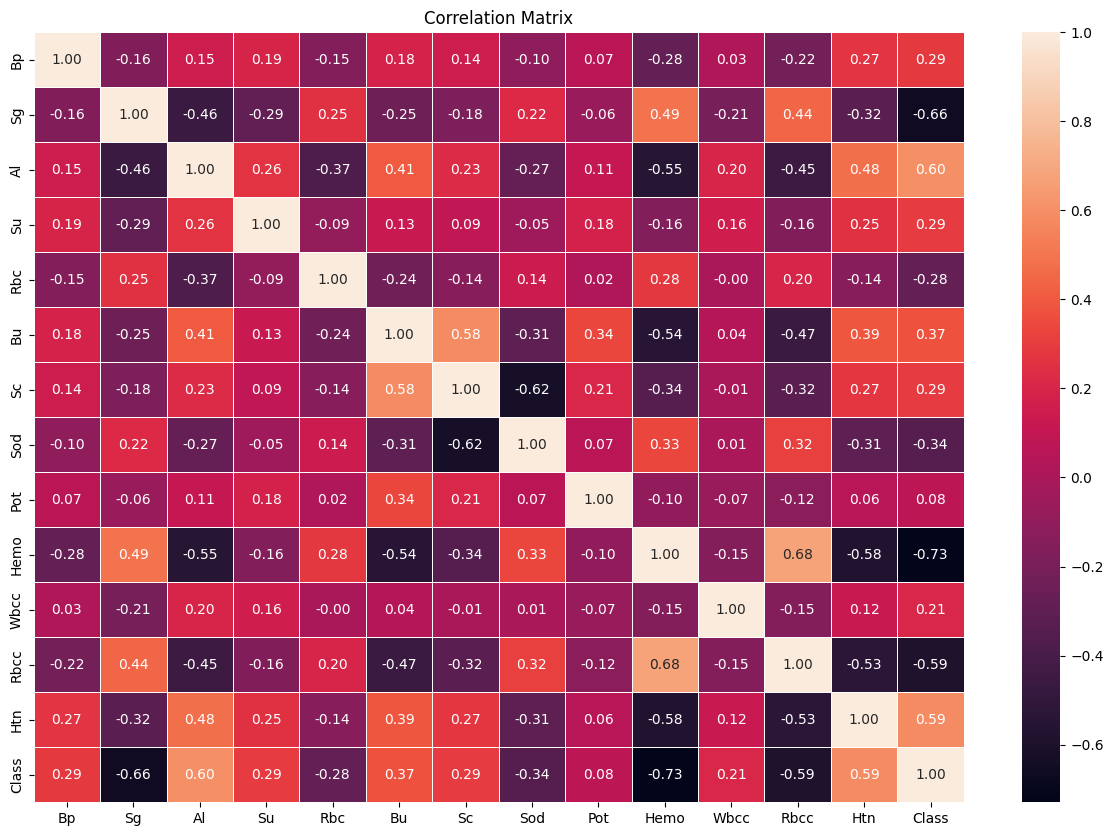

In [21]:
# 1. Importing Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing Dataset

# Load the dataset
df = pd.read_csv('../datasets/kidney_disease.csv')

# 3. Data Visualization

# View the first few rows of the data
print(df.head())

# Check the distribution of the target variable
print(df['Class'].value_counts())

# Check for missing values
print(df.isna().sum())

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()





Model Performance Metrics:
                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression    0.9750   0.980769  0.980769  0.980769
1           Random Forest    1.0000   1.000000  1.000000  1.000000
2           Decision Tree    1.0000   1.000000  1.000000  1.000000
3     K-Nearest Neighbors    0.7250   0.894737  0.653846  0.755556
4  Support Vector Machine    0.9625   0.962264  0.980769  0.971429
5                AdaBoost    1.0000   1.000000  1.000000  1.000000
6       Gradient Boosting    0.9875   1.000000  0.980769  0.990291
7                 XGBoost    0.9875   1.000000  0.980769  0.990291


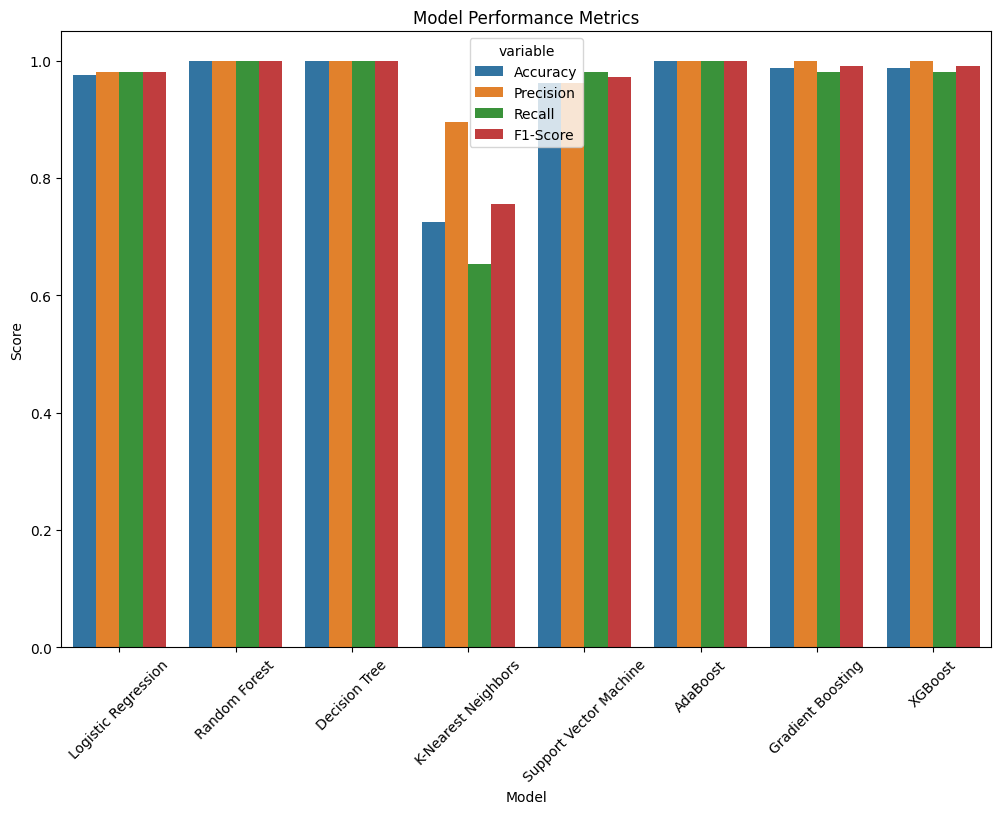

In [23]:
# 4. Data Splitting

# Split into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 5. Defining ML models

# Define the models with specified parameters
models = [
    ('Logistic Regression', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1, criterion='gini', random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Support Vector Machine', SVC(kernel='linear')),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, max_depth=3, random_state=42))
]

# 6. Training models

# Initialize a list to store model performance metrics
model_metrics = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    model_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# 7. Evaluating model performance

# Create a DataFrame for all metrics
metrics_df = pd.DataFrame(model_metrics)

# Display the metrics DataFrame
print("Model Performance Metrics:")
print(metrics_df)

# Visualize the metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='value', hue='variable', 
            data=pd.melt(metrics_df, id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score']))
plt.xticks(rotation=45)
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

In [24]:
#---------------------------------------------------
# Random Forest has highest recall.
# Extracting the Random Forest

from joblib import dump

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Save the model to a file
dump(rf_model, '../models/chronic_kidney_disease_prediction_rf.sav')

['../models/chronic_kidney_disease_prediction_rf.sav']